In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("records_final_series_odi_v10.csv")

In [3]:
df.head(6)

,Player,Country,% Team Runs,Mat,Inns,NO,50s,100s,0s,HS,Runs,S/R,Avg,Ca,St,Series_Code,H/A,Decade_Index,Matches
0,Edrich J H,England,43.16%,1,1,0,1,0,0,82,82,68.91,82,0,0,193,Away,0,1
1,Chappell I M,Australia,31.41%,1,1,0,1,0,0,60,60,58.25,60,0,0,193,Home,0,1
2,Walters K D,Australia,21.47%,1,1,0,0,0,0,41,41,80.39,41,1,0,193,Home,0,1
3,Lawry W M,Australia,14.14%,1,1,0,0,0,0,27,27,55.1,27,1,0,193,Home,0,1
4,Knott A P E,England,12.63%,1,1,0,0,0,0,24,24,77.42,24,2,1,193,Away,0,1
5,Fletcher K W R,England,12.63%,1,1,0,0,0,0,24,24,51.06,24,0,0,193,Away,0,1


In [4]:
for i in df.index:
    if type(df[' Decade_Index '][i]) == str:
        df[' Decade_Index '][i] = int(df[' Decade_Index '][i])

In [5]:
df[' Decade_Index '][13619] 

5

In [6]:
series = df[' Decade_Index '].values


In [7]:
series = [int(x) for x in series]

In [8]:
#print(df['Series_Code'][1000])

In [9]:
number, series_unique = np.unique(series, return_inverse = True)  
#print(number)
#print(len(series_unique))
#print(len(number))

In [10]:
players = df['Player'].values
player_names, player_indices = np.unique(players, return_index = True)
print(player_names)
print(len(player_names))
print(len(player_indices))


['Aamer Hameed' 'Aamer Hanif' 'Aamer Malik' ... 'van Wyk M N'
 'van der Merwe R E' 'van der Wath J J']
2202
2202


In [11]:
# -> filter the players based on decades 

player_dict_temp_3 = {}
for i in df.index:
    if df["Player"][i] in player_dict_temp_3.keys():
        player_dict_temp_3[df["Player"][i]] = player_dict_temp_3[df["Player"][i]] + [i]
    else:
        player_dict_temp_3[df["Player"][i]] = [i]



In [12]:
print(player_dict_temp_3['Kumar B'])

[19189, 19241, 19564, 19603, 19775, 19887, 19950, 20057, 20166, 20425, 20476, 20741, 21005, 21113, 21152, 21334, 21471, 21982, 22300, 22345, 22391, 22424, 22544, 22572, 22722]


In [13]:
player_dict_temp_3

{'Edrich J H': [0, 145, 179, 228],
 'Chappell I M': [1, 26, 119, 198, 254, 346, 800],
 'Walters K D': [2, 35, 128, 202, 253, 476, 813, 931],
 'Lawry W M': [3],
 'Knott A P E': [4, 30, 79, 159, 191, 211, 315, 399, 472],
 'Fletcher K W R': [5, 24, 72, 96, 147, 185, 199, 220, 246, 1099, 1155],
 'Chappell G S': [6,
  25,
  121,
  197,
  252,
  347,
  461,
  790,
  874,
  925,
  1056,
  1126,
  1348,
  1421,
  1486],
 "D'Oliveira B L": [7, 41],
 'Stackpole K R': [8, 23, 123],
 'Redpath I R': [9, 134, 210, 352],
 'Marsh R W': [10,
  36,
  138,
  203,
  272,
  362,
  468,
  804,
  872,
  942,
  1033,
  1060,
  1143,
  1295,
  1356,
  1418,
  1540,
  1702],
 'Hampshire J H': [11, 33],
 'Boycott G': [12,
  28,
  73,
  118,
  507,
  572,
  639,
  681,
  788,
  841,
  865,
  983,
  1026,
  1112],
 'Shuttleworth K': [13],
 'Lever P': [14, 89, 183, 215, 237, 329],
 'Snow J A': [15, 45, 88, 333],
 'Illingworth R': [16, 81],
 'Cowdrey M C': [17],
 'Thomson A L': [18],
 'McKenzie G D': [19],
 'Mallett

In [14]:
# to do -> remove unnecessary dictionaries and instead use series_occurences that we defined later to find the first occurence of every series
trps = dict() #total runs per series
mps = {} # matches per series
arps = {} #average runs per series
sid = {} # series in decade
arpd = np.zeros(9)
tspd = np.zeros(9)
for i in df.index:
    x = df['Series_Code'][i]
    trps[x] = 0
    mps[x] = 0
    #arps[x] = 0
    
    
for i in df.index:
    x = df['Series_Code'][i]
    trps[x] = trps[x] + df['Runs'][i]
    mps[x] =  df['Matches'][i]
    sid[x] = df[' Decade_Index '][i]

for i in trps.keys():
    arps[i] =trps[i]/mps[i]
    
for i in arps.keys():
    arpd[sid[i]]+= arps[i]
    tspd[sid[i]] += 1          
    
arpd = arpd/tspd
print(arpd)
w = np.sum(arpd)/arpd
w = w/np.average(w)
print(w)


#print(1,2)
#print(k)


#print(d[1] + d[2])
    

[344.00598997 340.41070291 356.62238576 370.27897906 390.98356522
 387.0104765  395.9546819  422.62648598 456.91145125]
[1.10992926 1.1216519  1.07066277 1.03117469 0.9765687  0.98659426
 0.96430811 0.90345098 0.83565932]


arps

In [15]:
total_entries = len(df.index)

In [16]:
weighted_runs = np.zeros(total_entries)
for i in df.index:
    #print(i)
    weighted_runs[i] = df["Runs"][i]*w[df[" Decade_Index "][i]]

In [17]:
weighted_runs

array([91.01419906, 66.59575541, 45.50709953, ...,  5.84961524,
        3.34263728,  3.34263728])

In [18]:
runs_metric_4 = []
player_dict_temp_4 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_3[i]:
        runs += weighted_runs[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 40):    
        runs_metric_4.append(runs/no_of_matches)
        player_dict_temp_4[i] = (runs/no_of_matches)
    
#print(player_dict_temp_4)

s_4 = [(k,player_dict_temp_4[k]) for k in sorted(player_dict_temp_4, key=player_dict_temp_4.get, reverse = True)]
#print(s_4)
for k,v in s_4:
    print(k,":",v)

Bevan M G : 53.65689683404696
Zaheer Abbas : 53.28644926129483
Kohli V : 51.91147934196949
Richards I V A : 51.73216157568824
de Villiers A B : 50.30581179073757
Greenidge C G : 49.07288525258623
Dhoni M S : 47.548053421425315
Jones D M : 47.45777002632027
Trott I J L : 47.431777178324545
Amla H M : 45.71390311805397
Hussey M E K : 45.03950983937326
Javed Miandad : 44.95187320721564
Haynes D L : 44.764278695827244
Chappell G S : 44.73985704410242
Tendulkar S R : 44.29252091054531
Lloyd C H : 44.20944449955014
Root J E : 44.1503036076883
Dippenaar H H : 44.06767642572975
Kallis J H : 43.31492391424537
Lamb A J : 43.003444091657734
Clarke M J : 42.981970394950224
Marsh G R : 42.513743372514234
Taylor L R P L : 42.16122549872506
Hayden M L : 41.7690558215036
Williamson K S : 41.43897428542191
Crowe M D : 41.23987440720339
Smith R A : 41.20914984996504
Mohammad Yousuf : 40.997069823619384
Ponting R T : 40.903431026134015
Lara B C : 40.60918176871217
Klusener L : 40.56898287362699
Kirsten G

In [19]:
runs_metric_5 = []
player_dict_temp_5= {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_3[i]:
        runs += weighted_runs[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 80):    
        runs_metric_5.append(runs/no_of_matches)
        player_dict_temp_5[i] = (runs/no_of_matches)
    
#print(player_dict_temp_5)   

s_5 = [(k,player_dict_temp_5[k]) for k in sorted(player_dict_temp_5, key=player_dict_temp_5.get, reverse = True)]
#print(s_5)
for k,v in s_5:
    print(k,":",v)

Bevan M G : 53.65689683404696
Kohli V : 51.91147934196949
Richards I V A : 51.73216157568824
de Villiers A B : 50.30581179073757
Greenidge C G : 49.07288525258623
Dhoni M S : 47.548053421425315
Jones D M : 47.45777002632027
Amla H M : 45.71390311805397
Hussey M E K : 45.03950983937326
Javed Miandad : 44.95187320721564
Haynes D L : 44.764278695827244
Tendulkar S R : 44.29252091054531
Root J E : 44.1503036076883
Kallis J H : 43.31492391424537
Lamb A J : 43.003444091657734
Clarke M J : 42.981970394950224
Marsh G R : 42.513743372514234
Taylor L R P L : 42.16122549872506
Hayden M L : 41.7690558215036
Williamson K S : 41.43897428542191
Crowe M D : 41.23987440720339
Mohammad Yousuf : 40.997069823619384
Ponting R T : 40.903431026134015
Lara B C : 40.60918176871217
Klusener L : 40.56898287362699
Kirsten G : 40.39334104413981
Dhawan S : 40.35280860416138
Martyn D R : 40.33993026148986
Sarwan R R : 40.19878429840175
Chanderpaul S : 39.9065947083213
Knight N V : 39.906041762745964
Sharma R G : 39.

In [20]:
series_codes = df['Series_Code'].values
#print(series_codes)

In [21]:
series_list, series_occurances = np.unique(series_codes, return_index=True)
#series_list

In [22]:
dict_series={}
for i in range(len(series_list)):
    dict_series[series_list[i]] = i

In [23]:
series_to_number = {'Australia':0, 'Pakistan':1, 'New Zealand':2, 'West Indies':3, 'England':4, 'India' :5, 'Sri Lanka':6, 'Bangladesh':7, 'Zimbabwe':8, 'South Africa':9, 'Other':10} 
#opposition_country =[]
series_country = []
j = 0
for i in series_occurances:
    home = 0
    away = 0
    j = i
    s_code = df['Series_Code'][i]
    while 1 != 0:
        #print(j)
        if df[' H/A'][j] == 'Home' and home == 0:
            #print(df['Country'][j])
            country = df['Country'][j]
            home = home + 1
        if df['Series_Code'][j]!=s_code or home ==1:
            break    
        j = j + 1 
    if country in series_to_number.keys():
        series_country.append(series_to_number[country])
    else:
        series_country.append(10)

In [24]:
print(len(series_country))

656


runs_metric_25 = []
player_dict_temp_25 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_3[i]:
        runs += weighted_runs_2[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 35):    
        runs_metric_25.append(runs/no_of_matches)
        player_dict_temp_25[i] = (runs/no_of_matches)
    
#print(player_dict_temp_30)
s_25 = [(k,player_dict_temp_25[k]) for k in sorted(player_dict_temp_25, key=player_dict_temp_25.get, reverse = True)]

for k,v in s_25:
    print(k,":",v)
#print(s)

In [25]:
# filling up the 3D array (for countries/decade) -> first iteration
runs_per_country_decade3 = np.zeros((9,11,11))
series_per_country_decade3 = np.zeros((9,11,11))
countries = []
series = []
print(series_to_number)
for i in df.index:
    decade_code = df[" Decade_Index "][i]
    series_code = df['Series_Code'][i]
    index = dict_series[series_code]
    player_country_name = df["Country"][i]
    if player_country_name not in series_to_number.keys():
        #print(series_code)
        player_country = 10
    else:
        player_country = series_to_number[df["Country"][i]]
        
    series_country_1 = series_country[index]
    #opposition_country_1 = opposition_country[index]
    Inns = df["Inns"][i]
    if  Inns== 0:
        Inns=1
    runs_per_country_decade3[decade_code][series_country_1][player_country] += (df["Runs"][i])
    matches_in_ser = df['Mat'][i]
    if series_code not in series:
        countries = []
        series.append(series_code)
        series_per_country_decade3[decade_code][series_country_1][player_country] += matches_in_ser
        countries.append(player_country)
    elif player_country not in countries:
        print(player_country)
        series_per_country_decade3[decade_code][series_country_1][player_country] += matches_in_ser
        countries.append(player_country)
        
        

#runs_per_country_decade3[0][9][0]/series_per_country_decade3[0][9][0]


{'Australia': 0, 'Pakistan': 1, 'New Zealand': 2, 'West Indies': 3, 'England': 4, 'India': 5, 'Sri Lanka': 6, 'Bangladesh': 7, 'Zimbabwe': 8, 'South Africa': 9, 'Other': 10}
0
0
1
2
4
2
5
1
0
4
4
1
0
3
5
6
10
0
5
4
1
3
4
1
0
1
2
1
0
4
2
1
0
5
6
10
2
4
0
4
0
3
2
5
3
5
4
0
1
4
2
6
1
5
1
5
0
5
0
2
4
0
6
5
6
3
1
5
2
8
0
6
1
5
2
3
1
0
6
4
1
6
4
5
1
6
2
4
2
0
6
1
2
4
0
3
6
2
5
0
4
0
6
6
5
1
1
5
2
4
6
0
7
6
6
2
1
6
0
2
4
2
0
3
5
1
6
6
4
1
3
4
3
5
2
1
4
5
4
0
3
1
5
6
8
2
1
3
2
6
3
2
5
6
7
1
5
1
6
3
5
6
1
4
4
0
1
2
1
5
6
0
5
3
6
1
0
4
5
5
4
1
6
2
5
0
2
1
6
7
4
4
2
3
2
4
5
6
5
7
6
4
3
3
5
1
5
1
5
3
6
2
1
9
0
3
5
4
6
8
9
1
0
8
2
0
1
2
5
1
6
8
5
1
9
8
4
2
8
3
4
6
9
3
6
3
6
9
8
6
9
2
8
6
2
4
0
2
5
2
6
0
10
2
6
4
5
0
1
0
1
5
8
3
2
2
6
9
4
8
2
0
9
5
8
0
2
1
6
7
3
6
3
1
8
5
2
6
3
4
8
0
6
9
1
3
4
10
2
8
2
1
5
1
5
6
5
0
5
8
1
1
6
1
10
9
0
1
2
6
1
9
4
1
0
5
8
5
4
2
0
1
8
5
1
2
5
4
6
5
7
1
5
1
5
8
10
7
3
6
1
5
7
4
5
1
10
5
6
9
2
8
2
8
4
10
0
8
9
1
0
2
9
5
7
5
2
6
9
5
8
9
5
2
8
6
4
0
1
1
8
6
1
2
4
6
9
2
7


In [26]:
from numpy import inf
arpscd3 = runs_per_country_decade3/series_per_country_decade3
arpscd3[arpscd3 == inf] = 0
np.nan_to_num(arpscd3, copy=False)
l_30= np.true_divide(arpscd3.sum(1),(arpscd3!=0).sum(1))
np.nan_to_num(l_30, copy=False)
l_31 = np.true_divide(l_30.sum(1),(l_30!=0).sum(1))
k = l_31[:,None,None]/arpscd3
k[k == inf] = 0
k_30 = w[:,None,None] * k

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [27]:
weighted_runs_3 = np.zeros(len(df.index))
for i in df.index:
    #print(i)
    index = dict_series[df['Series_Code'][i]]
    #print(series_country[index])
    #print(index)
    player_country_name = df["Country"][i]
    if player_country_name not in series_to_number.keys():
        player_country = 10
    else:
        player_country = series_to_number[df["Country"][i]]
    #player_country = series_to_number[df["Country"][i]]
    weighted_runs_3[i] = df["Runs"][i]*k_30[df[" Decade_Index "][i]][series_country[index]][player_country]

In [28]:
len(weighted_runs_3)

22761

In [43]:
runs_metric_30 = []
player_dict_temp_30 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_3[i]:
        runs += weighted_runs_3[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 40):    
        runs_metric_30.append(runs/no_of_matches)
        player_dict_temp_30[i] = (runs/no_of_matches)
    
s_30 = [(k,player_dict_temp_30[k]) for k in sorted(player_dict_temp_30, key=player_dict_temp_30.get, reverse = True)]

for k,v in s_30:
    print(k,":",v)

Trott I J L : 53.39571721660796
Kohli V : 53.04852270184274
Zaheer Abbas : 52.08544659931686
de Villiers A B : 48.08040662037822
Bevan M G : 47.64304725743498
Richards I V A : 47.29904878837556
Dhoni M S : 46.36910700686249
Amla H M : 45.50684218951595
Root J E : 44.63770533603881
Jones D M : 44.48680642489484
Greenidge C G : 44.25540246523665
Chappell G S : 44.144669991996686
Misbah-ul-Haq : 44.097011033306345
Taylor L R P L : 43.961783262842964
Javed Miandad : 43.57794464412208
Sangakkara K C : 42.8156148716387
Mathews A D : 42.76782972951822
Sarwan R R : 42.610485090405255
Tendulkar S R : 42.51844181485474
Haynes D L : 42.50518393494309
Williamson K S : 41.99356263601215
Crowe M D : 41.521008809429674
Lara B C : 41.36969452355342
Dhawan S : 41.27996311968914
Chanderpaul S : 41.01799554316914
Pietersen K P : 40.68116367517755
Lamb A J : 40.5747666328369
Dippenaar H H : 40.51048104266251
Knight N V : 40.3622837871229
Kallis J H : 40.25473991798878
Hussey M E K : 40.119632326977374
Gup

In [30]:
series_lists, series_counts = np.unique(series_codes, return_counts=True)
#series_lists

In [31]:
spv = []
for i in df.index:
    if i==0:
        count = 1
    elif i == 22760 or df["Series_Code"][i] != df["Series_Code"][i-1]:
        if i == 22760:
            count += 1
        x = np.array(range(count))
        x = x/count
        y = np.ones(count)-x 
        for i in y:
            spv.append(i)
        count = 1
    elif df["Series_Code"][i] == df["Series_Code"][i-1]:
        count += 1
len(spv)

22761

In [44]:
def player_rank(no_of_matches):
    #runs_metric_35 = []
    player_dict_temp_35 = {}
    for i in player_names:
        matches=0
        runs = 0
        for j in player_dict_temp_3[i]:
            runs += weighted_runs_3[j]*spv[j]
            matches += (df['Inns'][j] - df['NO'][j])
        if(matches > no_of_matches):    
            #runs_metric_35.append(runs/no_of_matches)
            player_dict_temp_35[i] = (runs/matches)

    s_35 = [(k,player_dict_temp_35[k]) for k in sorted(player_dict_temp_35, key=player_dict_temp_35.get, reverse = True)]

    #for k,v in s_35:
        #print(k,":",v)
    return s_35    

In [33]:
len(player_dict_temp_3)

2202

In [34]:
sorted(spv)[-1]

1.0

In [48]:
s_35 = player_rank(50)
for k,v in s_35:
    first = player_indices[np.where(player_names == k)[0][0]]
    if df[' Decade_Index '][first] >= 4 :
        print(k,":",v)

Kohli V : 48.90574182372023
Trott I J L : 48.56303132664924
de Villiers A B : 44.229334247184845
Amla H M : 42.06217803727083
Root J E : 39.96594314175108
Dhoni M S : 39.45484691764698
Sangakkara K C : 39.36188327658167
Taylor L R P L : 38.78270891694415
Misbah-ul-Haq : 37.98590139956186
Sarwan R R : 37.62991064208177
Dhawan S : 37.46518484853828
Williamson K S : 37.11163060785167
Knight N V : 36.862717502037405
Kallis J H : 36.288252110887555
Guptill M J : 35.640429029195225
Sharma R G : 35.1040782235961
Dilshan T M : 35.02162843792445
Pietersen K P : 34.69608576401907
Clarke M J : 34.53337865339904
Mathews A D : 34.46564120668084
Gayle C H : 34.45495107974374
Mohammad Yousuf : 34.090025461711456
du Plessis F : 34.04559754969522
Hussey M E K : 33.887152091162854
de Kock Q : 33.886887995641345
Dippenaar H H : 33.76298143029136
Trescothick M E : 33.479540313075276
Bell I R : 32.89182825202866
Bailey G J : 32.37031148796234
Cook A N : 32.1108975348899
Warner D A : 31.771659938326195
Shak

In [52]:
s_45 = player_rank(5)
for country in series_to_number.keys():
    print(country)
    count=0
    for k,v in s_45:
        first = player_indices[np.where(player_names == k)[0][0]]
        #print(first,"->",df[' Decade_Index '][first])
        last = player_dict_temp_3[k][-1]
        if df['Country'][last] == country and df[' Decade_Index '][last] >= 8:
            print(k,":",v)
            count += 1
        if count == 12:
            break
            
    print("\n")

Australia
Stoinis M P : 36.57638138271823
Bailey G J : 32.37031148796234
Warner D A : 31.771659938326195
Smith S P D : 29.35580842843086
Finch A J : 26.28198920232161
Marsh S E : 23.362225322291717
Maxwell G J : 22.763693263058116
Marsh M R : 22.654645746746795
White C L : 22.436919905619206
Head T M : 19.882174239457047
Faulkner J P : 18.693403481260635
Khawaja U T : 18.547924742134402


Pakistan
Haris Sohail : 37.2121252112524
Babar Azam : 37.2110344467522
Azhar Ali : 32.385491484764486
Fakhar Zaman : 31.192756502611413
Ahmed Shehzad : 29.581428383297634
Mohammad Hafeez : 28.535196040828883
Umar Akmal : 28.499823387069103
Shoaib Malik : 26.374929214353184
Sohaib Maqsood : 26.33984917050144
Sarfraz Ahmed : 24.029949618452566
Mohammad Rizwan : 19.52704893719024
Asad Shafiq : 18.680035963719007


New Zealand
Taylor L R P L : 38.78270891694415
Williamson K S : 37.11163060785167
Guptill M J : 35.640429029195225
Elliott G D : 27.025930437412264
McCullum B B : 24.722790707146263
Latham T W 

In [49]:
for country in series_to_number.keys():
    print(country)
    count=0
    for k,v in s_35:
        first = player_indices[np.where(player_names == k)[0][0]]
        #print(first,"->",df[' Decade_Index '][first])
        if df['Country'][first] == country and df[' Decade_Index '][first] >= 4:
            print(k,":",v)
            count += 1
        if count == 6:
            break
            
    print("\n")

Australia
Clarke M J : 34.53337865339904
Hussey M E K : 33.887152091162854
Bailey G J : 32.37031148796234
Warner D A : 31.771659938326195
Watson S R : 30.827104792228322
Smith S P D : 29.35580842843086


Pakistan
Misbah-ul-Haq : 37.98590139956186
Mohammad Yousuf : 34.090025461711456
Ahmed Shehzad : 29.581428383297634
Mohammad Hafeez : 28.535196040828883
Umar Akmal : 28.499823387069103
Salman Butt : 27.694756894651807


New Zealand
Taylor L R P L : 38.78270891694415
Williamson K S : 37.11163060785167
Guptill M J : 35.640429029195225
Styris S B : 29.49004695816145
Elliott G D : 27.025930437412264
McCullum B B : 24.722790707146263


West Indies
Sarwan R R : 37.62991064208177
Gayle C H : 34.45495107974374
Samuels M N : 29.120452222779235
Simmons L M P : 28.756438921314974
Bravo D M : 27.92120066930711
Hinds W W : 23.74145120740629


England
Trott I J L : 48.56303132664924
Root J E : 39.96594314175108
Knight N V : 36.862717502037405
Pietersen K P : 34.69608576401907
Trescothick M E : 33.479

In [50]:
for country in series_to_number.keys():
    print(country)
    count=0
    for k,v in s_35:
        first = player_indices[np.where(player_names == k)[0][0]]
        #print(first,"->",df[' Decade_Index '][first])
        if df['Country'][first] == country and df[' Decade_Index '][first] >= 0:
            print(k,":",v)
            count += 1
        if count == 6:
            break
            
    print("\n")

Australia
Bevan M G : 41.00341884978064
Jones D M : 40.87492751201589
Chappell G S : 40.404197796780174
Marsh G R : 35.805303984618554
Clarke M J : 34.53337865339904
Hussey M E K : 33.887152091162854


Pakistan
Zaheer Abbas : 48.69434245449234
Javed Miandad : 39.123145667368526
Misbah-ul-Haq : 37.98590139956186
Mohammad Yousuf : 34.090025461711456
Saeed Anwar : 33.218921625860325
Inzamam-ul-Haq : 32.095361596231456


New Zealand
Taylor L R P L : 38.78270891694415
Crowe M D : 37.60201074863964
Williamson K S : 37.11163060785167
Guptill M J : 35.640429029195225
Twose R G : 33.4814521629221
Jones A H : 32.88732743591125


West Indies
Richards I V A : 44.33022883410812
Greenidge C G : 40.77375167290425
Haynes D L : 39.331708973178685
Sarwan R R : 37.62991064208177
Lara B C : 37.44180077959816
Chanderpaul S : 35.865380526983444


England
Trott I J L : 48.56303132664924
Root J E : 39.96594314175108
Knight N V : 36.862717502037405
Lamb A J : 36.03580381013442
Pietersen K P : 34.69608576401907

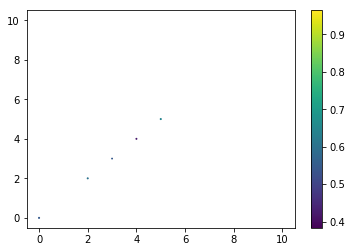

In [38]:
rng = np.random.RandomState(0)
x = range(11)
y = range(11)
colors = rng.rand(11)
sizes = k_30[0]

plt.scatter(x, y, c=colors, s=sizes,
            cmap='viridis')
plt.colorbar();  # show color scale

In [51]:
for country in series_to_number.keys():
    print(country)
    count=0
    for k,v in s_35:
        last = player_dict_temp_3[k][-1]
        #print(first,"->",df[' Decade_Index '][first])
        if df['Country'][last] == country and df[' Decade_Index '][last] >= 8:
            print(k,":",v)
            count += 1
        if count == 12:
            break
            
    print("\n")

Australia
Bailey G J : 32.37031148796234
Warner D A : 31.771659938326195
Smith S P D : 29.35580842843086
Finch A J : 26.28198920232161
Maxwell G J : 22.763693263058116
White C L : 22.436919905619206
Wade M S : 15.806835309866514


Pakistan
Ahmed Shehzad : 29.581428383297634
Mohammad Hafeez : 28.535196040828883
Umar Akmal : 28.499823387069103
Shoaib Malik : 26.374929214353184
Kamran Akmal : 18.155315748448256


New Zealand
Taylor L R P L : 38.78270891694415
Williamson K S : 37.11163060785167
Guptill M J : 35.640429029195225
Elliott G D : 27.025930437412264
McCullum B B : 24.722790707146263
Latham T W M : 24.009538054264414
Ronchi L : 16.795097537152554
Southee T G : 4.682087727615829


West Indies
Gayle C H : 34.45495107974374
Samuels M N : 29.120452222779235
Bravo D M : 27.92120066930711
Pollard K A : 23.106651493524552
Ramdin D : 19.16567298710422


England
Root J E : 39.96594314175108
Morgan E J G : 29.048208963781505
Buttler J C : 27.969182721068048
Roy J J : 25.396231339118852
Hale

In [39]:
k_30[0,None,:]

array([[[1.1181511 , 0.        , 1.04348503, 0.75018091, 0.92650417,
         1.13692928, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 1.09954775, 1.06434566, 1.21541407, 1.30222936,
         1.39892956, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.85826506, 1.23130184, 1.10654438, 1.0183199 , 2.47880502,
         1.2601283 , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.63430701, 1.11472888, 0.        , 0.64849976, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.99676815, 1.01781974, 1.10384286, 0.92517707, 0.95702632,
         1.0834748 , 1.09783905, 0.        , 0.        , 0.        ,
         1.97611029],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.     

(9, 10, 10)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


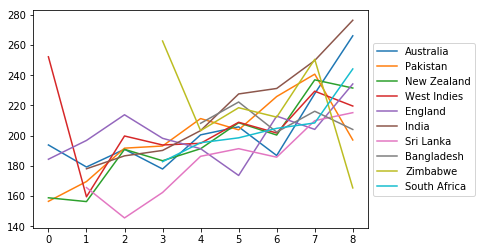

In [40]:
x = arpscd3[:,:10,:10]
print(np.shape(x))
img_plot= np.true_divide(x.sum(2),(x!=0).sum(2))
img=plt.plot(img_plot)

plt.legend(series_to_number.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.colorbar()

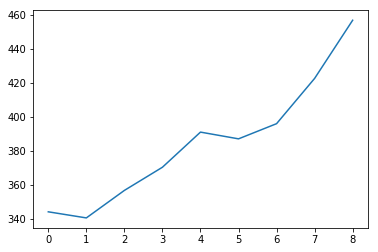

In [41]:
plt.plot(arpd)

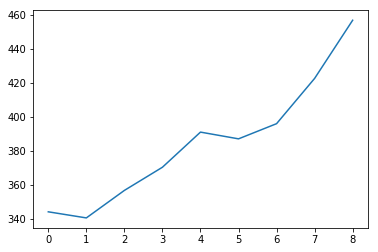

In [42]:
plt.plot(arpd)